Iteration 0, Cost: 0.6931
Iteration 100, Cost: 0.4655
Iteration 200, Cost: 0.4558
Iteration 300, Cost: 0.4540
Iteration 400, Cost: 0.4535
Iteration 500, Cost: 0.4533
Iteration 600, Cost: 0.4533
Iteration 700, Cost: 0.4532
Iteration 800, Cost: 0.4532
Iteration 900, Cost: 0.4532
Iteration 1000, Cost: 0.4532
Iteration 1100, Cost: 0.4532
Iteration 1200, Cost: 0.4532
Iteration 1300, Cost: 0.4532
Iteration 1400, Cost: 0.4532
Iteration 1500, Cost: 0.4532
Iteration 1600, Cost: 0.4532
Iteration 1700, Cost: 0.4532
Iteration 1800, Cost: 0.4532
Iteration 1900, Cost: 0.4532
Iteration 2000, Cost: 0.4532
Iteration 2100, Cost: 0.4532
Iteration 2200, Cost: 0.4532
Iteration 2300, Cost: 0.4532
Iteration 2400, Cost: 0.4532
Iteration 2500, Cost: 0.4532
Iteration 2600, Cost: 0.4532
Iteration 2700, Cost: 0.4532
Iteration 2800, Cost: 0.4532
Iteration 2900, Cost: 0.4532
Iteration 3000, Cost: 0.4532
Iteration 3100, Cost: 0.4532
Iteration 3200, Cost: 0.4532
Iteration 3300, Cost: 0.4532
Iteration 3400, Cost: 0.45

C:\Users\Hp\AppData\Local\Temp\ipykernel_6004\566794541.py:111: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cm[int(true)][int(pred)] += 1


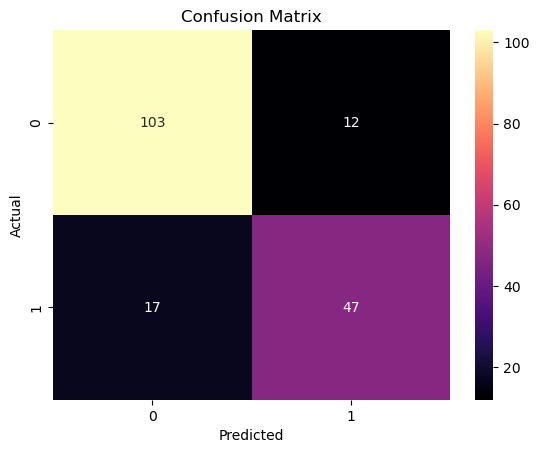


Feature Importance:
       Feature  Coefficient  Abs(Coefficient)
1         Sex    -1.289914          1.289914
0      Pclass    -0.911079          0.911079
2         Age    -0.436493          0.436493
3       SibSp    -0.285152          0.285152
7  Embarked_S    -0.160839          0.160839
4       Parch    -0.121282          0.121282
5        Fare     0.019319          0.019319
6  Embarked_Q     0.011061          0.011061

Top 2 features used for decision boundary: ['Sex', 'Pclass']


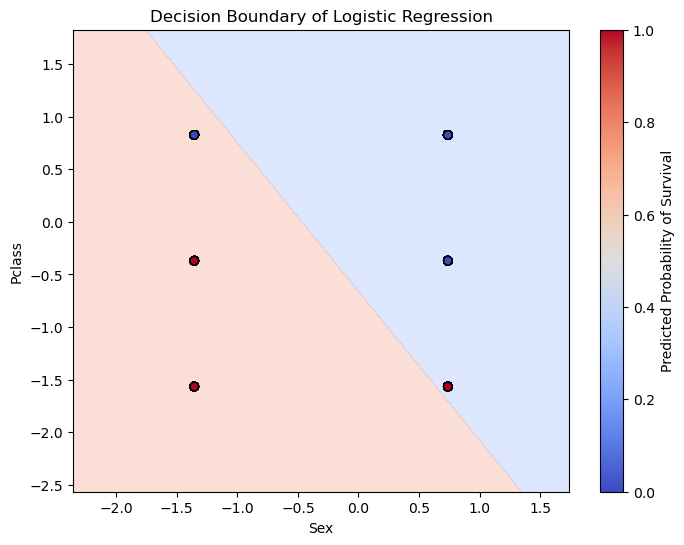

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
df = pd.read_csv('titanic.csv')

# Encode categorical variables and handle missing values
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features].values.astype(float)
y = df['Survived'].values.reshape(-1, 1)


# Split into train/test (80% train, 20% test)
split = int(0.8 * X.shape[0])
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#Normalization using train statistics
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# 2. Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=2000):
        self.lr = lr
        self.n_iter = n_iter
        self.costs = [] #to store cost values

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, h, y):
        m = y.shape[0]
        #cross entropy loss
        cost = -(1/m) * np.sum(y * np.log(h+1e-10)+(1-y)*np.log(1-h+1e-10))
        return cost

    def fit(self, X, y):
        self.theta = np.zeros((X.shape[1], 1))
        self.bias = 0
        m = X.shape[0]

        for i in range(self.n_iter):
            z = np.dot(X, self.theta) + self.bias
            h = self.sigmoid(z)
            dz = h - y
            dtheta=np.dot(X.T, dz)/m
            dbias=np.sum(dz)/m

            self.theta -= self.lr * dtheta
            self.bias -= self.lr * dbias

            # Compute and store cost every 100 iterations
            if i % 100 == 0:
                cost = self.compute_cost(h, y)
                self.costs.append(cost)
                print(f"Iteration {i}, Cost: {cost:.4f}")


    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# 3. Metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-10)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-10)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-10)

# 4. Train, predict and evaluate
model = LogisticRegressionScratch(lr=0.1, n_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("Accuracy: ", accuracy(y_test, y_pred))
print("Precision: ", precision(y_test, y_pred))
print("Recall: ", recall(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


# 5. Visualize Confusion Matrix
cm = np.zeros((2,2), dtype=int)
for true, pred in zip(y_test, y_pred):
    cm[int(true)][int(pred)] += 1

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Show most important features
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.theta.flatten()
})
feature_importance['Abs(Coefficient)'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs(Coefficient)', ascending=False)
print("\nFeature Importance:\n", feature_importance)

# Get top 2 features
top_features = feature_importance['Feature'].iloc[:2].tolist()
print(f"\nTop 2 features used for decision boundary: {top_features}")

# 6. Decision Boundary visualization for top 2 features
X_vis = df[top_features].values.astype(float)
y_vis = df['Survived'].values.reshape(-1, 1)

# Normalize
X_vis = (X_vis - X_vis.mean(axis=0)) / X_vis.std(axis=0)
# Corresponding model parameters
theta_vis = model.theta[[features.index(f) for f in top_features]]
bias_vis = model.bias

# Create grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over the grid
Z = model.sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], theta_vis) + bias_vis)
Z = Z.reshape(xx.shape)

# Plot boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.3, cmap='coolwarm')
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis.ravel(), cmap='coolwarm', edgecolors='k')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Decision Boundary of Logistic Regression')
plt.colorbar(label='Predicted Probability of Survival')
plt.show()